In [1]:
import assignment.load as load
import assignment.display as display
%matplotlib inline

In [2]:
data = load.load_data(load.DEFAULT_PATH)

In [3]:
from assignment.classify import NearestNeighbour
nn = NearestNeighbour(data._raw_data['train_data'], data._raw_data['train_labels'])

In [4]:
import numpy as np

In [5]:
data.wordsearch1.classify(nn)
data.wordsearch2.classify(nn)

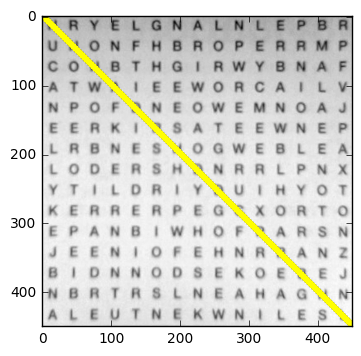

In [6]:
import matplotlib.pyplot as plt
data.wordsearch1.show()
plt.imshow(display.line((0, 0), (450, 450)))

In [7]:
data._raw_data['words']

['barry',
 'beardshaw',
 'bridgeman',
 'brown',
 'cane',
 'crowe',
 'don',
 'fish',
 'flowerdew',
 'hoare',
 'jekyll',
 'jellicoe',
 'kent',
 'langley',
 'nesfield',
 'paine',
 'paxton',
 'peto',
 'repton',
 'robinson',
 'roper',
 'shenstone',
 'vanbrugh',
 'wright']

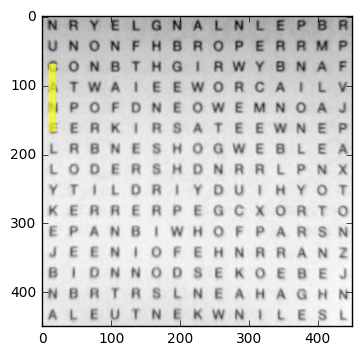

In [12]:
word = 'cane'
fits = data.wordsearch1.find_word_fits(word)
best = fits[0]
x, y = best['coords']
x += 0.5
y += 0.5
data.wordsearch1.show()
line = display.line((x*30, y*30), (((len(word)-1)*best['direction'][0] + x)*30, ((len(word)-1)*best['direction'][1] + y)*30), rad=5)
plt.imshow(line, alpha=0.7)